In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind

leases = pd.read_csv("Leases.csv")
occupancy = pd.read_csv("Major_Market_Occupancy_Data-revised.csv")
price_avail = pd.read_csv("Price_and_Availability_Data.csv")
unemployment = pd.read_csv("Unemployment.csv")

In [ ]:
print("Leases Info:\n")
print(leases.info())

print("\nOccupancy Info:\n")
print(occupancy.info())

print("\nPrice and Availability Info:\n")
print(price_avail.info())

print("\nUnemployment Info:\n")
print(unemployment.info())

Leases Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  in

In [ ]:
print("Leases Data:\n")
print(leases.head())

print("\nOccupancy Data:\n")
print(occupancy.head())

print("\nPrice and Availability Data:\n")
print(price_avail.head())

print("\nUnemployment Data:\n")
print(unemployment.head())

Leases Data:

   year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   
3  2018      Q1          1.0  Atlanta           1100 Circle 75   
4  2018      Q1          1.0  Atlanta             1200 Ashwood   

                                         building_id                address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...     10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...   3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...   1000 Parkwood Cir SE   
3  Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...  1100 Circle 75 Pky SE   
4  Atlanta_Central Perimeter_Atlanta_1200 Ashwood...       1200 Ashwood Pky   

  region     city state  ...  overall_rent direct_available_space  \
0  South  Atlanta    GA  ...     24.345689   

In [ ]:
# Fix for Leases dataset: Convert ZIP code from int64 to string
leases['zip'] = leases['zip'].astype(str)

# Optionally, convert the 'quarter' column to a category in leases for clarity and memory efficiency
leases['quarter'] = leases['quarter'].astype('category')

# Fix for Price and Availability dataset: Convert RBA, available_space, and leasing to float
price_avail['RBA'] = price_avail['RBA'].astype(float)
price_avail['available_space'] = price_avail['available_space'].astype(float)
price_avail['leasing'] = price_avail['leasing'].astype(float)

# Optionally, if you want to standardize the 'quarter' column across datasets:
occupancy['quarter'] = occupancy['quarter'].astype('category')
price_avail['quarter'] = price_avail['quarter'].astype('category')
unemployment['quarter'] = unemployment['quarter'].astype('category')

print("Leases Info (CLEANED):\n")
print(leases.info())

print("\nOccupancy Info (CLEANED):\n")
print(occupancy.info())

print("\nPrice and Availability Info (CLEANED):\n")
print(price_avail.info())

print("\nUnemployment Info (CLEANED):\n")
print(unemployment.info())

Leases Info (CLEANED):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   year                            194685 non-null  int64   
 1   quarter                         194685 non-null  category
 2   monthsigned                     193822 non-null  float64 
 3   market                          194685 non-null  object  
 4   building_name                   157999 non-null  object  
 5   building_id                     194685 non-null  object  
 6   address                         194685 non-null  object  
 7   region                          194685 non-null  object  
 8   city                            194685 non-null  object  
 9   state                           194685 non-null  object  
 10  zip                             194685 non-null  object  
 11  internal_submarket              194685 no

In [ ]:
# ------------------------------
# Leases Data Missing Value Handling
# ------------------------------

# Drop columns that are completely missing (0 non-null values)
cols_to_drop = [
    'direct_available_space', 'direct_availability_proportion',
    'direct_internal_class_rent', 'direct_overall_rent',
    'sublet_available_space', 'sublet_availability_proportion',
    'sublet_internal_class_rent', 'sublet_overall_rent'
]
leases.drop(columns=cols_to_drop, inplace=True)

# For categorical columns with missing values, fill with 'Unknown'
categorical_cols = ['building_name', 'company_name', 'internal_industry',
                    'internal_market_cluster', 'space_type']
for col in categorical_cols:
    leases[col].fillna('Unknown', inplace=True)

# For transaction_type (only one missing value), fill with the mode
leases['transaction_type'].fillna(leases['transaction_type'].mode()[0], inplace=True)

# For numeric columns with missing values, fill with the median
numeric_cols = ['RBA', 'available_space', 'availability_proportion',
                'internal_class_rent', 'overall_rent', 'leasing']
for col in numeric_cols:
    leases[col].fillna(leases[col].median(), inplace=True)


# ------------------------------
# Occupancy Data Missing Value Handling
# ------------------------------

# Occupancy data has no missing values.
# (You can verify with:)
print(occupancy.isnull().sum())
# If desired, you could use a forward-fill:
occupancy.fillna(method='ffill', inplace=True)


# ------------------------------
# Price and Availability Data Missing Value Handling
# ------------------------------

# For numeric columns that have missing values, impute with the median.
numeric_cols_pa = [
    'direct_available_space', 'direct_availability_proportion',
    'direct_internal_class_rent', 'direct_overall_rent',
    'sublet_available_space', 'sublet_availability_proportion',
    'sublet_internal_class_rent', 'sublet_overall_rent'
]
for col in numeric_cols_pa:
    price_avail[col].fillna(price_avail[col].median(), inplace=True)


# ------------------------------
# Unemployment Data Missing Value Handling
# ------------------------------

# Unemployment data has no missing values.
# (Verify with:)
print(unemployment.isnull().sum())
# If needed, you could also forward-fill:
unemployment.fillna(method='ffill', inplace=True)

<ipython-input-5-a649f782fac2>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  leases[col].fillna('Unknown', inplace=True)
<ipython-input-5-a649f782fac2>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

year                             0
quarter                          0
market                           0
ending_occupancy_proportion      0
starting_occupancy_proportion    0
avg_occupancy_proportion         0
dtype: int64
year                 0
quarter              0
month                0
state                0
unemployment_rate    0
dtype: int64


<ipython-input-5-a649f782fac2>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  leases[col].fillna(leases[col].median(), inplace=True)
<ipython-input-5-a649f782fac2>:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  occupancy.fillna(method='ffill', inplace=True)
<ipython-input-5-a649f782fac2>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavio

In [ ]:
print("Leases Data:\n")
print(leases.head())

print("\nOccupancy Data:\n")
print(occupancy.head())

print("\nPrice and Availability Data:\n")
print(price_avail.head())

print("\nUnemployment Data:\n")
print(unemployment.head())

Leases Data:

   year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   
3  2018      Q1          1.0  Atlanta           1100 Circle 75   
4  2018      Q1          1.0  Atlanta             1200 Ashwood   

                                         building_id                address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...     10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...   3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...   1000 Parkwood Cir SE   
3  Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...  1100 Circle 75 Pky SE   
4  Atlanta_Central Perimeter_Atlanta_1200 Ashwood...       1200 Ashwood Pky   

  region     city state  ... internal_market_cluster costarID space_type  \
0  South  Atlanta    GA  ...          

          Market   p-value   Pre-Mean  Post-Mean
0  San Francisco  0.043857  95.022339  58.475272
1      San Diego  0.833569  46.837083  45.250846
2    Los Angeles  0.019363  86.451297  54.092469


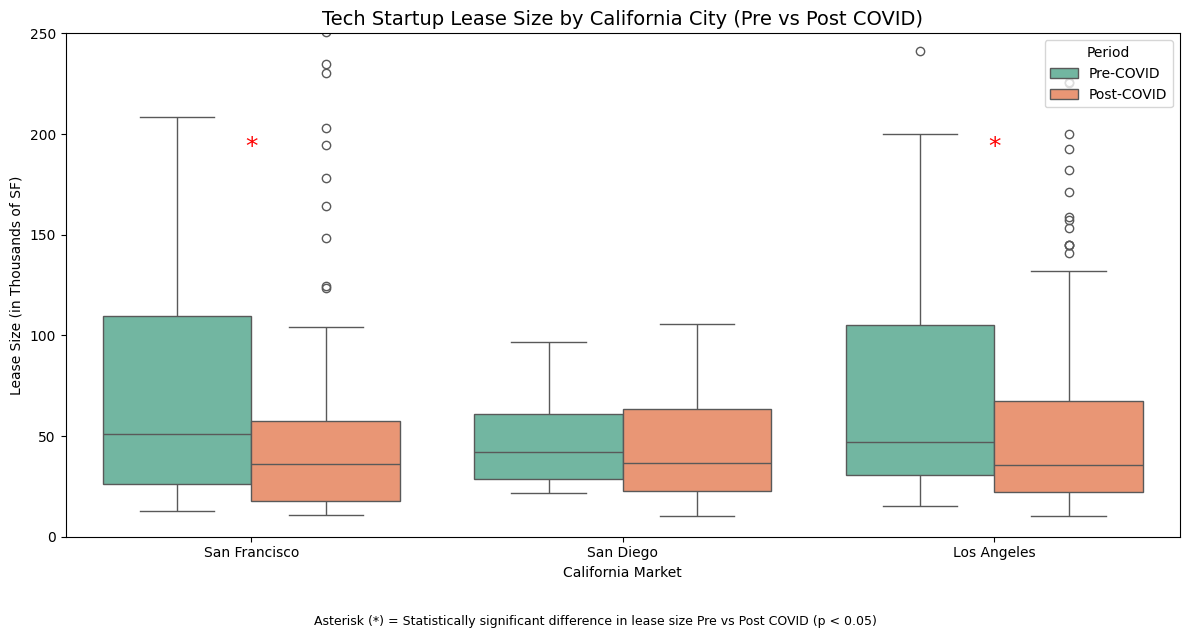

In [ ]:
# Define the desired order for California cities (excluding San Jose and Irvine)
california_cities = ['San Francisco', 'San Diego', 'Los Angeles']

# Step 1: Filter to tech leases in California markets (only those in our list)
tech_ca = tech_leases[tech_leases['market'].isin(california_cities)].copy()
tech_ca['leasedSF_k'] = tech_ca['leasedSF'] / 1000

# Step 2: Run t-tests for Pre- vs Post-COVID within each market
results = []
for city in california_cities:
    pre = tech_ca[(tech_ca['market'] == city) & (tech_ca['period'] == 'Pre-COVID')]['leasedSF_k']
    post = tech_ca[(tech_ca['market'] == city) & (tech_ca['period'] == 'Post-COVID')]['leasedSF_k']

    ttest = ttest_ind(pre, post, equal_var=False, nan_policy='omit')
    results.append({
        'Market': city,
        'p-value': ttest.pvalue,
        'Pre-Mean': pre.mean(),
        'Post-Mean': post.mean()
    })

# Create a DataFrame of results (preserving our defined order)
ttest_df = pd.DataFrame(results)
print(ttest_df)

# Step 3: Create the boxplot with explicit order
plt.figure(figsize=(12, 6))
sns.boxplot(data=tech_ca, x='market', y='leasedSF_k', hue='period', order=california_cities, palette='Set2')
plt.title('Tech Startup Lease Size by California City (Pre vs Post COVID)', fontsize=14)
plt.ylabel('Lease Size (in Thousands of SF)')
plt.xlabel('California Market')
plt.ylim(0, 250)
plt.legend(title='Period', loc='upper right')

# Annotate statistically significant differences based on our defined order
for i, city in enumerate(california_cities):
    # Retrieve the p-value for this market from our results
    p_val = ttest_df.loc[ttest_df['Market'] == city, 'p-value'].values[0]
    if p_val < 0.05:
        # Place an asterisk at the appropriate x-position for the market
        plt.text(i, 190, '*', fontsize=18, ha='center', color='red')

plt.figtext(0.5, -0.05,
            "Asterisk (*) = Statistically significant difference in lease size Pre vs Post COVID (p < 0.05)",
            ha='center', fontsize=9)
plt.tight_layout()
plt.show()
